In [496]:
# -*- coding: utf-8 -*-
#future is the missing compatibility layer between Python 2 and Python 3. 
#It allows you to use a single, clean Python 3.x-compatible codebase to 
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [418]:
#encoding. word encodig
import codecs
#finds all pathnames matching a pattern, like regex
import glob
#log events for libraries
import logging
#concurrency
import multiprocessing
#dealing with operating system , like reading file
import os
#pretty print, human readable
import pprint
#regular expressions
import re

In [419]:
#natural language toolkit
import nltk
#word 2 vec
import gensim.models.word2vec as w2v
#dimensionality reduction
import sklearn.manifold
#math
import numpy as np
#plotting
import matplotlib.pyplot as plt
#parse dataset
import pandas as pd
#visualization
import seaborn as sns
#classification
from sklearn import svm

In [420]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [421]:
#stopwords like the at a an, unnecesasry
#tokenization into sentences, punkt 
#http://www.nltk.org/
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /Users/panchen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/panchen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [501]:
#convert into list of words
#remove unecessary characters, split into words, no hyhens and shit
#split into words
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    word_u = [word.decode("utf-8") for word in words]
    return word_u
#take 1 file
def tokenizer(file_name1):
    #initialize rawunicode , we'll add all text to this one bigass file in memory
    corpus_raw = u""
    
    with codecs.open(file_name1,"r", "utf-8") as txt:
        corpus_raw += txt.read()

    print ("Corpus is now {0} characters long".format(len(corpus_raw)))
    #tokenizastion! saved the trained model here
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    #tokenize into sentences
    raw_sentences = tokenizer.tokenize(corpus_raw)
    print(len(raw_sentences))
    #for each sentece, sentences where each word is tokenized
    sentences = []
    for raw_sentence in raw_sentences:
#         if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence.lower()))
    print(len(sentences))
    return sentences

def read_file(file_name):
    with open(file_name) as f:
        sentences = []

        for line in f:
            sentences.append(sentence_to_wordlist(line))


    return sentences


def read_file_2(file_name1,file_name2):
    sentences = []
    label = []
    with open(file_name1) as f:
        for line in f:
            sentences.append(sentence_to_wordlist(line.lower()))
            label.append(0)
    
    with open(file_name2) as f:
        for line in f:
            sentences.append(sentence_to_wordlist(line.lower()))
            label.append(1)

    return sentences, label


    

#take 2 files
def tokenizer_2(file_name1, file_name2):
    #initialize rawunicode , we'll add all text to this one bigass file in memory
    corpus_raw = u""
    
    with codecs.open(file_name1,"r", "utf-8") as txt:
        corpus_raw += txt.read()
        
    with codecs.open(file_name2,"r", "utf-8") as txt:
        corpus_raw += txt.read()
        

    print ("Corpus is now {0} characters long".format(len(corpus_raw)))
    #tokenizastion! saved the trained model here
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    #tokenize into sentences
    raw_sentences = tokenizer.tokenize(corpus_raw)
    
    #for each sentece, sentences where each word is tokenized
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(sentence_to_wordlist(raw_sentence.lower()))
    return sentences

#generate label
def label(file_name1, file_name2):
    #initialize rawunicode , we'll add all text to this one bigass file in memory
    corpus_raw_0 = u""
    corpus_raw_1 = u""
    label = []
    with codecs.open(file_name1,"r", "utf-8") as txt:
        corpus_raw_0 += txt.read()
        
    with codecs.open(file_name2,"r", "utf-8") as txt:
        corpus_raw_1 += txt.read()
        

#     print ("Corpus is now {0} characters long".format(len(corpus_raw)))
    #tokenizastion! saved the trained model here
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    #tokenize into sentences
    raw_sentences_0 = tokenizer.tokenize(corpus_raw_0)
    raw_sentences_1 = tokenizer.tokenize(corpus_raw_1)

    for raw_sentence in raw_sentences_0:
        if len(raw_sentence) > 0:
            label.append(0)
    for raw_sentence in raw_sentences_1:
        if len(raw_sentence) > 0:
            label.append(1)
    label = np.array(label)
    print(label.shape)
    return label
      

In [423]:
# # sentences= tokenizer('pos_train.txt','neg_train.txt')
# sentences= tokenizer_2('pos.txt','neg.txt')
# #count tokens, each one being a sentence
# token_count = sum([len(sentence) for sentence in sentences])
# print("The book corpus contains {0:,} tokens".format(token_count))
# print(sentences[0])

Corpus is now 675539 characters long
The book corpus contains 113,084 tokens
[u'the', u'sum', u'of', u'all', u'fears', u'is', u'simply', u'a', u'well', u'made', u'and', u'satisfying', u'thriller']


In [515]:
#step 2 build our model, another one is Glove
#define hyperparameters

# Dimensionality of the resulting word vectors.
#more dimensions mean more traiig them, but more generalized
num_features = 50

#
# Minimum word count threshold.
min_word_count = 2

# Number of threads to run in parallel.
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 5

# Downsample setting for frequent words.
#rate 0 and 1e-5 
#how often to use
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
seed = 1

In [516]:
review2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [517]:
sentences,training_label =  read_file_2("pos.txt","neg.txt")
print(sentences[0])
print(len(sentences))

review2vec.build_vocab(sentences)

[u'the', u'sum', u'of', u'all', u'fears', u'is', u'simply', u'a', u'well', u'made', u'and', u'satisfying', u'thriller']
6559


In [518]:
print("Word2Vec vocabulary length:", len(review2vec.wv.vocab))

Word2Vec vocabulary length: 6786


In [519]:
#get the count of examples
corpus_count = review2vec.corpus_count

#train model on sentneces
review2vec.train(sentences,total_examples=corpus_count,epochs=review2vec.iter)

396199

In [520]:
#save model
if not os.path.exists("trained"):
    os.makedirs("trained")

In [521]:
review2vec.save(os.path.join("trained", "review2vec.w2v"))

In [522]:
#load model
review2vec = w2v.Word2Vec.load(os.path.join("trained", "review2vec.w2v"))

In [523]:
# training_token_set= tokenizer_2('pos.txt','neg.txt')
# training_label = label('pos.txt','neg.txt')

In [524]:
def sen_vector(sentences):
    #set array 
    whole_array = []
    
    #get average vector of pos sentences
    for sentence in sentences:
        vector = np.zeros(50)
        count = 0
        count_noindex = 0

        for word in sentence:
            try:
                vector=review2vec.wv[word]
                count += 1
            except:
                count_noindex += 1

        if count >0:
            avg_vector = vector/count
        else:
            avg_vector = vector
        
        whole_array.append(avg_vector)
        
    whole_array = np.array(whole_array)
    
    print(whole_array.shape)
    return whole_array
           

In [526]:
training_vector_set = sen_vector(sentences)

(6559, 50)


In [527]:
# test_token_set = tokenizer('../test/test.txt')
test_token_set = read_file('../test/test.txt')
len(test_token_set)

1747

In [528]:
test_vector_set = sen_vector(test_token_set)

(1747, 50)


In [530]:
print(len(training_label))

6559


In [531]:
#use SVM to train classification model
clf = svm.SVC()
clf.fit(training_vector_set, training_label)
prediction = clf.predict(training_vector_set)
n = len(prediction)
count_right = 0
for i in range(n):
    if prediction[i]== training_label[i]:
        count_right += 1
print("the accuracy of SVM with training dataset: " + str(float(count_right)/n))


the accuracy of SVM with training dataset: 0.524775118158


In [532]:
from sklearn import linear_model
rg = linear_model.LogisticRegression()
rg.fit(training_vector_set, training_label)
prediction = rg.predict(training_vector_set)
n = len(prediction)
count_right = 0
for i in range(n):
    if prediction[i]== training_label[i]:
        count_right += 1
print("the accuracy of LogisticRegression with training dataset: " + str(float(count_right)/n))

the accuracy of LogisticRegression with training dataset: 0.529958835188


In [533]:
#predict test using Logistic Regression model
test_label = rg.predict(test_vector_set)
n = len(test_label)
Id = [i+1 for i in range(n)]

#output test
output = pd.DataFrame(Id,columns = ['Id'] )
output['Prediction'] = test_label
output.to_csv('prediction_word_embedding.csv',index = False)


In [441]:
#squash dimensionality to 2
#https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [442]:
#put it all into a giant matrix
all_word_vectors_matrix = review2vec.wv.syn0

In [443]:
#train t sne
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [444]:
#plot point in 2d space
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[review2vec.wv.vocab[word].index])
            for word in review2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [445]:
points.head(10)

,word,x,y
0,yellow,-3.648995,-7.618014
1,four,-5.136759,0.369356
2,hanging,0.900558,-1.139178
3,woody,-5.578141,6.947105
4,comically,3.016420,6.294150
5,marching,0.319810,-0.068161
6,treading,-0.983342,-8.991992
7,originality,-7.571546,4.102124
8,lore,0.096049,-6.437223
9,lord,-6.791758,-6.220706


In [446]:
#plot
sns.set_context("poster")

In [447]:
# points.plot.scatter("x", "y", s=10, figsize=(20, 12))

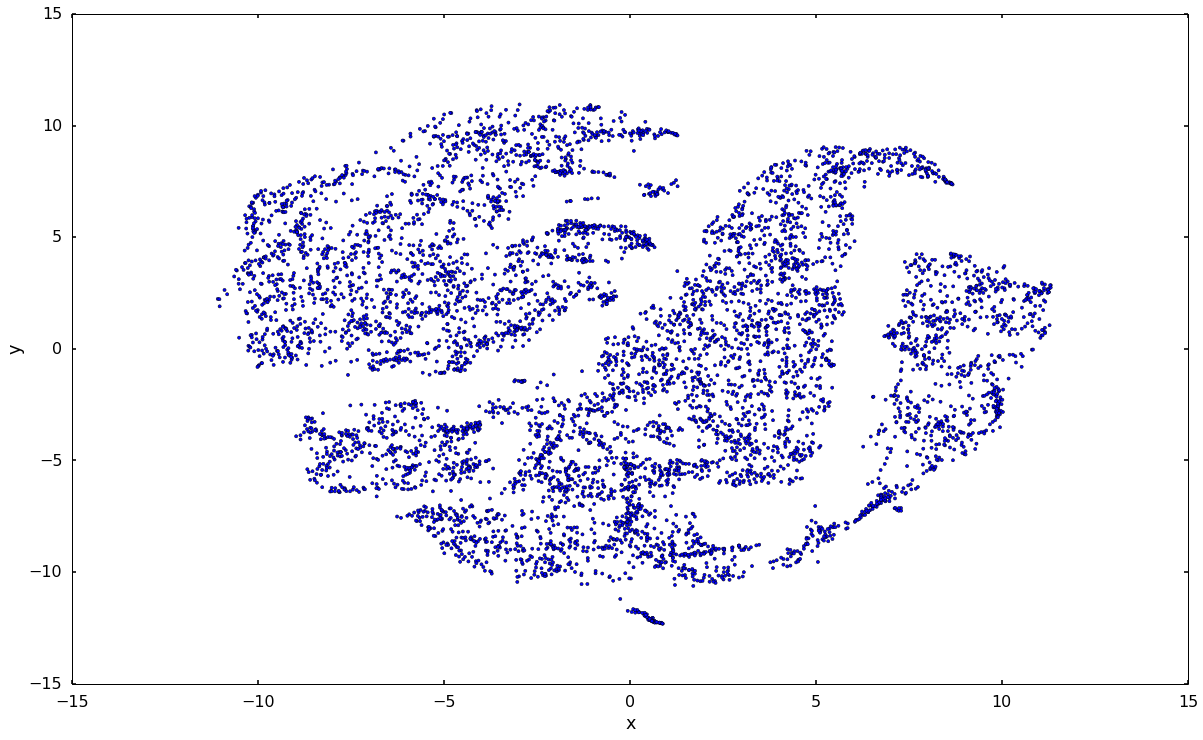

In [448]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [449]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)
#         print(point.word)

In [451]:
print(points.loc[points['word'] == 'good'])

      word        x        y
4351  good -0.72003  2.09803


In [453]:
print(points.loc[points['word'] == 'great'])

       word         x         y
1267  great -1.728509  2.132436


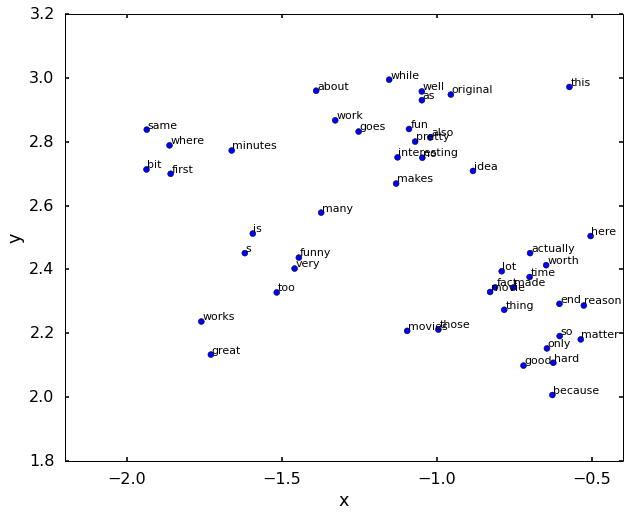

In [461]:
plot_region(x_bounds=(-2, -0.5), y_bounds=(2, 3))

In [458]:
review2vec.wv.most_similar("good")

[(u'bad', 0.9851557612419128),
 (u'hard', 0.9850916862487793),
 (u'also', 0.9840101003646851),
 (u'actually', 0.9839882850646973),
 (u'idea', 0.9834693074226379),
 (u'worth', 0.9830633401870728),
 (u'goes', 0.9818326830863953),
 (u'lot', 0.9817518591880798),
 (u'fact', 0.981407642364502),
 (u'made', 0.9804321527481079)]

In [459]:
thrones2vec.most_similar("wonderful")

[(u'winning', 0.9998716711997986),
 (u'black', 0.999867856502533),
 (u'screenplay', 0.9998587369918823),
 (u'unexpected', 0.9998581409454346),
 (u'filmmaker', 0.9998571872711182),
 (u'pure', 0.9998546838760376),
 (u'last', 0.999854326248169),
 (u'shot', 0.9998541474342346),
 (u'again', 0.9998520016670227),
 (u'star', 0.9998519420623779)]

In [460]:
thrones2vec.most_similar("fine")

[(u'thoughtful', 0.9998441338539124),
 (u'deeply', 0.9998438358306885),
 (u'told', 0.9998414516448975),
 (u'intriguing', 0.9998396635055542),
 (u'short', 0.9998355507850647),
 (u'writer', 0.9998346567153931),
 (u'contemporary', 0.9998259544372559),
 (u'emotions', 0.9998254179954529),
 (u'female', 0.9998248219490051),
 (u'engrossing', 0.9998236894607544)]

In [464]:
#distance, similarity, and ranking
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = review2vec.wv.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [468]:
nearest_similarity_cosmul('good','best','worst')

good is related to best, as long is related to worst


u'long'